# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [2]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import random

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

The situation where the indices of the data are ordered is kept with X and y original names.

In [3]:
# extract the data as numpy arrays of features, X, and target, y
X_original = df_wine[selected_features].values
y_original = wine.target

In order to obtain more meaningful and accurately comparable results (eg confusion matrix results), the indices of X and y data sets are mixed with the `random.permutation` command.

In [4]:
indices = np.arange(len(X_original))
np.random.seed(4567)
shuffled_indices = np.random.permutation(indices)

X = X_original[shuffled_indices]
y = y_original[shuffled_indices]

The `isna` method followed by the `sum` method is called to detect the number of missing data in each column in the **df_wine** dataset.

In [5]:
df_wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Row and column numbers are printed. How many different classes are in the target column are detected.

In [6]:
print('number of observations:', len(df_wine))
print('number of features:', X.shape[1])
print('number of classes in target column:', len(np.unique(y)))

number of observations: 178
number of features: 4
number of classes in target column: 3


### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

![image.png](./image.png)

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 

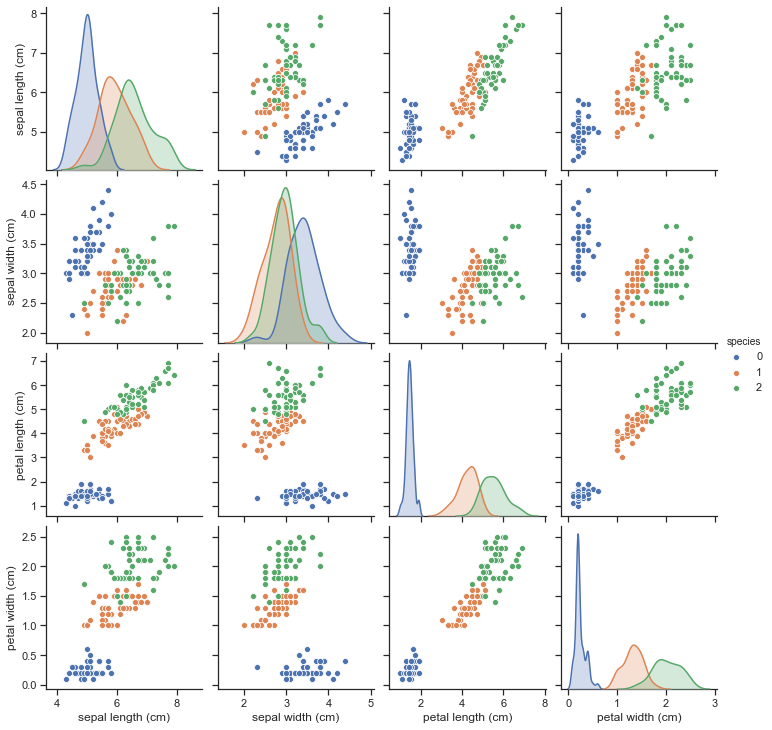

In [7]:
# define plotting function
def myplotGrid(X, y):
    df = pd.DataFrame(X, columns=selected_features)
    fig, ax = plt.subplots()
    classes = np.unique(y)
    labels = [f"Class {c}" for c in classes]
    colors = ["red", "green", "blue"]
    plt.rcParams["figure.subplot.right"] = 0.8
    pd.plotting.scatter_matrix(df, c=[ colors[cls] for cls in y], ax=ax)
    fig.set_size_inches(10, 10)
    handles = [
        plt.plot([], [], color=colors[cls], ls="", marker=".", markersize=np.sqrt(10))[0]
        for cls in classes
    ]
    plt.legend(handles, labels, loc=(1.02,0))

The data set of columns named *alcohol, flavanoids, color_intensity, ash* is already transferred to variable X. Then, X is converted to *Pandas* dataframe inside `myplotGrid` function with parameters X and y. To draw a matrix of scatter plots plotting. `Scatter_matrix` in the *Pandas* module is used. The subplots function of the *matplotlib* library by using object oriented methods is used and the colors and labels of the graphic markers are determined. The function is called after X and y values are given as parameter values and the pairplot is plotted.

/var/folders/1z/4vxcctj13w70p7lpfdqll_hw0000gn/T/ipykernel_12591/4088584314.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, c=[ colors[cls] for cls in y], ax=ax)


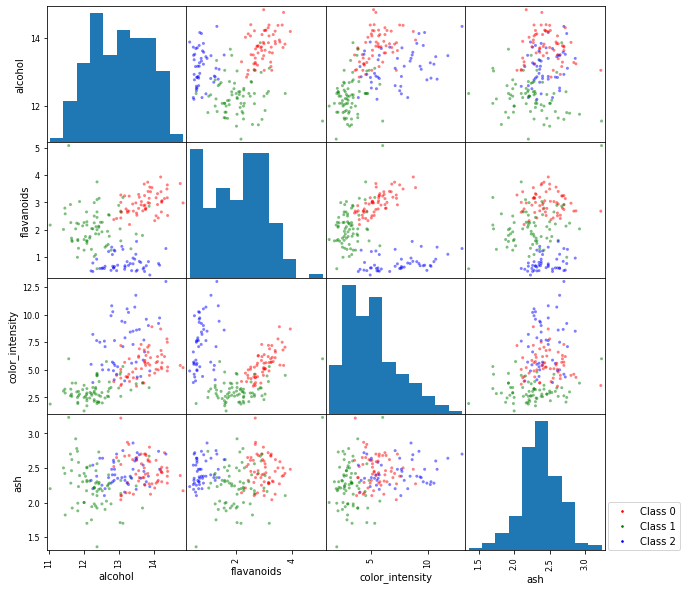

In [8]:
# run the plotting function
myplotGrid(X, y)
pass

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [9]:
# noise code 
mySeed = 2345
np.random.seed(mySeed)
XN = X + np.random.normal(0, 0.5, X.shape)

With `random` module in *numpy* library, the noise value is added to each value in the X dataset with a mean of 0 and a standard deviation of 0.5. The seed value is fixed so that it produces the same production every time. The dataset with noise added is called with the variable **XN** and pair plot is plotted again.

/var/folders/1z/4vxcctj13w70p7lpfdqll_hw0000gn/T/ipykernel_12591/4088584314.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df, c=[ colors[cls] for cls in y], ax=ax)


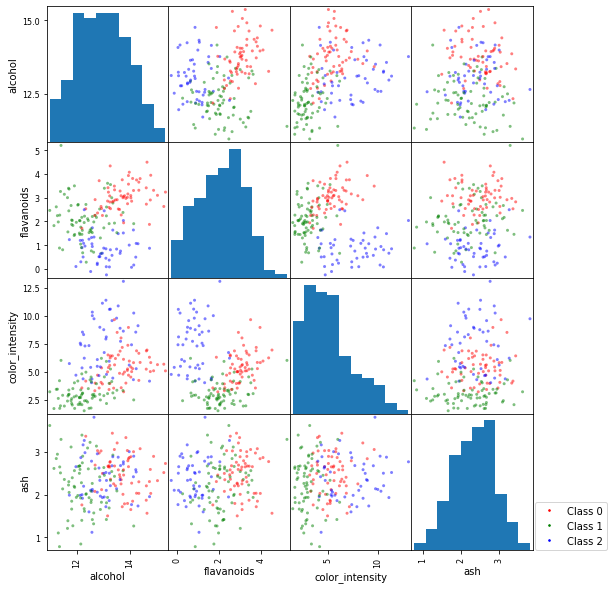

In [10]:
myplotGrid(XN, y)
pass


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can.

**Answer:** In datasets with a large number of columns, we can reduce the number of columns by using feature selection methods to facilitate data analysis. In order to choose 2 of the 4 columns we have in the wine dataset, we need to examine the relationship between the features. One of the tools that best summarizes this relationship is the pair plot graph. We already have a scatterplot (i.e. correlation plot) of each variable combination of our data frame.

As seen in this graph, we see that there is a relatively linear relationship between the *alcohol* and *color_intensity* columns. Therefore, if I were to build a classifier using only two features, it would be better to choose *alcohol* and *color_intensity* features.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


**Answer:** Because of noise the relationship between any two features is more difficult to determine by observing. It also hard to understand and interpret the data correctly. In pairplots drawn with noisy data, the data is more dispersed. In almost no subplot, a significant pattern can be seen between the changes in the data and histograms in diagonal spread over a wider area. Therefore, it is difficult to express data with measures of central tendency and dispersion from a statistical point of view.

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


Firstly, test data size is splitted as the last 30 of the clean, noisy and target dataset in order to check the final model works correctly.

In [11]:
# helper code
test_count = 30

X_train = X[:-test_count]
X_test = X[-test_count:]

XN_train = XN[:-test_count]
XN_test = XN[-test_count:]

y_train = y[:-test_count]
y_test = y[-test_count:]

To get the difference of X and X_pred to be used for prediction, a function called `myDifference` is created, whose parameters are X and X_pred. A list named `difference` is created to save these difference values. Then, the difference value between X and X_pred for each row is stored in the generated list and converted into a numpy array and returned. The function is called with the penultimate value for X and the last row value for X_pred.

In [12]:
def myDifference(X, X_pred):
    difference = []
    for i in range(len(X)):
        difference.append(X[i] - X_pred)
    return np.array(difference)

myDifference(X[:-1], X[-1])

array([[-1.36    ,  1.76    , -3.1     , -0.35    ],
       [-1.91    ,  2.29    , -2.35    ,  0.07    ],
       [-1.11    ,  0.28    ,  2.61    , -0.15    ],
       [ 0.35    ,  2.38    , -1.8     ,  0.01    ],
       [ 0.51    ,  2.47    , -1.1     ,  0.45    ],
       [ 0.77    ,  0.26    ,  3.6     ,  0.39    ],
       [-1.8     ,  4.58    ,  0.4     ,  0.88    ],
       [-0.31    ,  1.93    , -1.35    ,  0.2     ],
       [-0.31    ,  1.09    , -0.8     , -0.03    ],
       [ 0.98    ,  0.81    ,  7.4     ,  0.35    ],
       [-1.9     ,  2.08    , -2.7     , -0.53    ],
       [ 0.15    ,  2.03    , -1.4     ,  0.3     ],
       [-1.07    ,  0.52    , -2.55    , -0.14    ],
       [ 0.2     ,  2.28    ,  0.65    ,  0.11    ],
       [-1.32    ,  1.25    , -3.      ,  0.03    ],
       [ 0.84    ,  2.89    ,  1.15    ,  0.1     ],
       [-1.71    ,  1.11    , -3.      ,  0.27    ],
       [ 0.85    ,  2.15    , -0.36    ,  0.09    ],
       [ 0.13    ,  1.34    , -1.86    , -0.11

To measure the distance with the difference values obtained with the previous function, a function called `myDistance` with parameters X and X_pred is created. *euclidean* method is accepted as default value of distance, this value is given with parameter named f. The `myDifference` function, which takes the differences between X and X_pred, is called with the measurement variable. For the difference value of each line, two different measurement methods can be used, which are the *euclidean* method if the sum of the squares of the differences is taken and written into the square root, and the *manhatten* method if the absolute value of the differences is taken and summed. The norms obtained by these methods were transferred to the variable named `magnitude`. For each value from the `MyDifference` function, the norm function of the `linalg` method from the *numpy* library was used to easily take the square root of the sum of the squared differences for the *euclidean* method. The `abs` function was used for the *manhattan* method in order to calculate the absolute value element-wise. The calculations are transferred to the empty list named `array` that is created earlier and converted to numpy array and returned.

In [13]:
def myDistance(X, X_pred, f = 'euclidean'):
    measurement = myDifference(X, X_pred)
    array = []
    for i in range(len(measurement)):
        if f == 'euclidean':
            magnitude = np.linalg.norm(measurement[i])
        elif f == 'manhattan':
            magnitude = np.sum(np.abs(measurement[i]))
        array.append(magnitude)
    return np.array(array)

myDistance(X[:-1], X[-1])

array([3.83140966, 3.79731484, 2.85396216, 3.00449663, 2.78809971,
       3.71114538, 5.01505733, 2.38400923, 1.38747973, 7.51658167,
       3.93793093, 2.48865425, 2.81733917, 2.38180604, 3.50796237,
       3.22338332, 3.63718298, 2.3415166 , 2.29873878, 2.45175447,
       3.38263211, 3.21934776, 3.52923504, 0.88955045, 2.76702006,
       2.98048654, 3.79270352, 3.11220179, 4.01581872, 2.90962197,
       3.31270282, 0.56868269, 5.30296144, 1.6957889 , 0.89465077,
       4.68338553, 3.22879234, 3.41359049, 3.52203066, 1.75524927,
       1.62557682, 3.59826347, 2.73126344, 1.089174  , 0.47644517,
       3.10535022, 4.69417724, 2.29418831, 2.2656125 , 2.7985532 ,
       2.31943959, 4.21053441, 2.77969423, 3.01640515, 4.12719033,
       3.70929913, 2.4492652 , 4.00645729, 3.90993606, 3.38263211,
       2.60257565, 0.87258237, 4.00940145, 3.19959372, 3.49665554,
       4.60568127, 3.57981843, 2.46829901, 2.82775529, 2.29647556,
       2.53345614, 2.8077393 , 1.06911178, 0.23      , 2.31168

A function called `myNearest_indices` is created to find the smallest k indices from the array of norms. The `myDistance` function, which takes distance measurement with the *euclidean* and *manhattan* methods, is called with the variable named `distance`. The values inside this variable are sorted with the `argsort` function from smallest to largest and values up to k are returned. Then, the function is called with the index values of the 5 points closest to the X_pred value.

In [14]:
def myNearest_indices(X, X_pred, k, f = 'euclidean'):
    distance = myDistance(X, X_pred, f)
    return np.argsort(distance)[:k]

myNearest_indices(X[:-1], X[-1], 5)

array([ 73,  44, 112,  31,  94])

A function called `myNearest_classes` is created to find which class value in the target column belongs to the closest k index values obtained in the previous function. The values of the `myNearest_indices` function are kept in the variable named `indices`. For each saved index value, the class value in the target column of the index is added to the empty list named `classes`.

In [15]:
def myNearest_classes(X, X_pred, k, y, f = 'euclidean'):
    indices = myNearest_indices(X, X_pred, k, f)

    classes = []
    for i in indices:
        classes.append(y[i])
    return np.array(classes)

myNearest_classes(X[:-1], X[-1], 5, y[:-1])

array([2, 2, 2, 2, 2])

A function called `myknn` is created to determine that the k closest index values, measured by the *euclidean* distance measurement method, are observed in the class the most. The function that finds the class of the nearest indices with the `neighbor` variable is called. It is determined which points are close to x_pred and their number. The most observed class value is found with the variable named `most_frequent_class_index`. The y value to be estimated with this variable is determined and returned in the function.

In [16]:
#myknn code
def myknn(X, X_pred, k, y, f = 'euclidean'):
    neighbour = myNearest_classes(X, X_pred, k, y, f)
    classes, counts = np.unique(neighbour, return_counts=True)
    most_frequent_class_index=np.argmax(counts)
    return classes[most_frequent_class_index]

myknn(X[:-1], X[-1], 5, y[:-1])

2

The operations applied in the `myknn` function are applied in the `myMultiknn` function for multiple X_pred points instead of one X_pred point. The predicted class values in the target column of the 5 nearest neighbors and the last 10 of the X dataset are found by converting the neighbors variable to array with the `myMultiknn` function.

In [17]:
def myMultiknn(X, X_pred, k, y, f = 'euclidean'):
    neighbours = []
    for i in X_pred:
        multi = myknn(X, i, k, y, f)
        neighbours.append(multi)
    return np.array(neighbours)

myMultiknn(X[:-10], X[-10:], 5, y[:-10])

array([0, 1, 2, 1, 1, 1, 0, 1, 1, 2])

The `myMultiknn` function is applied to a split train and test set by taking the last 30 of X datasets.

In [18]:
k = 5
y_pred = myMultiknn(X_train, X_test, k, y_train)
y_pred

array([1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 1, 1, 0, 1, 1, 2])

Such are the class estimates for the test set based on the *euclidean* distance function and the 5 nearest neighbors.

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In the function created to print the confusion matrix, firstly, a matrix named `conf` consisting of 0 for all cell values with the number of rows and columns equal to the number of classes is created. Then, as the number of test data, the true value of each class in the matrix increases with each observation. The same is true for prediction values.
For better comparison, y_test, y_pred values are printed.

In [19]:
# confusion matrix, accuracy, precision, recall, etc. 
def myConfMat(y_test, y_pred, classno):
    conf=np.zeros((classno, classno), dtype=int)
    for i in range(len(y_test)):
        test = y_test[i]
        pred = y_pred[i]
        conf[test, pred] += 1
    return conf

print('y_test:', y_test)
print('y_pred:', y_pred)
print(myConfMat(y_test,y_pred,len(np.unique(y))))

y_test: [1 1 2 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 2 0 0 1 2 1 1 1 0 1 1 2]
y_pred: [1 1 2 0 1 1 0 0 2 2 1 0 0 1 1 0 0 0 2 0 0 1 2 1 1 1 0 1 1 2]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


To calculate the accuracy value, the function `myAccuracy` is written with parameters y_test, y_pred. The variable corrects with an initial value of 0 is incremented by one when the predicted class values have the same value as the y value allocated as the test. Then this value is divided by the total number of predicted values.

In [20]:
def myAccuracy(y_test,y_pred):
    corrects = 0
    for i in range(len(y_pred)):
        if y_test[i]==y_pred[i]:
            corrects +=1
    total = len(y_pred)
    return corrects/total
    
print(myAccuracy(y_test,y_pred))

1.0


Inside the `myPresicion` function, true positive values are divided by the positive prediction value. An array, consist of zeros, named `presicion` is created, the length of which is the same as the number of different classes. The value of each class is added to the `cls` variable. The number of correct guesses for each class is divided by the total number of guesses made for that class. These numbers for each class are added to the `presicion` array.

In [21]:
def myPrecision(y_test,y_pred):
    classes = np.unique(y_test)
    precision = np.zeros(classes.shape)
    for i in range(len(classes)):
        cls = classes[i]
        true_positives = np.count_nonzero((y_test == y_pred) & (y_test == cls))
        total_predicted = np.count_nonzero(y_pred == cls)
        precision[i] = true_positives / total_predicted
    return precision

print(myPrecision(y_test, y_pred))

[1. 1. 1.]


Inside the `myRecall` function, the number of true positives is divided by the total number of actually positive data. For this, an array called `Recall` is created, consisting of 0, each with a different class value length. The number of correct predictions for each class is divided by the total number of data belonging to that class. This value obtained for each class value is added to the `recall` array.

In [22]:
def myRecall(y_test, y_pred):
    classes = np.unique(y_test)
    recall = np.zeros(classes.shape)
    for i in range(len(classes)):
        cls = classes[i]
        true_positives = np.count_nonzero((y_pred == cls) & (y_test == y_pred))
        false_negatives = np.count_nonzero((y_test == cls) & (y_pred != cls))
        recall[i] = true_positives / (true_positives + false_negatives)
    return recall

print(myRecall(y_test, y_pred))

[1. 1. 1.]


To check the accuracy of the results, precision_score, recall_score, accuracy_score, confusion_matrix functions of the *sklearn* library are called.

In [23]:
# test evaluation code
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
# check that your functions do the same thing as the library versions
print('Confusion matrix: \n %s' % confusion_matrix(y_test, y_pred))
print('----------------')
print('accuracy: %s' % accuracy_score(y_test, y_pred))
print('----------------')
print('precision: %s' % precision_score(y_test, y_pred, average=None))
print('----------------')
print('recall: %s' % recall_score(y_test, y_pred, average=None))

Confusion matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
----------------
accuracy: 1.0
----------------
precision: [1. 1. 1.]
----------------
recall: [1. 1. 1.]


The confusion matrix, accuracy, precision and recall values are all the same as the results we found. All predictions for the test set are correct. Therefore precision and recall values are 1 for each class.


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In the myError function created to calculate the number of errors, the value of the variable named false is increased by 1 in the rows where the y_test and y_pred values are not equal.

In [24]:
def myError(y_test,y_pred):
    falses = 0
    for i in range(len(y_pred)):
        if y_test[i] != y_pred[i]:
            falses +=1
    return falses
    
print(myError(y_test,y_pred))

0


Operations to reduce the bias in combined hyperparameter tuning and model selection are performed inside the `myNestedCrossVal` function. The parameters of the function are X, y, seed to always reach the same evaluation results, fs to determine which distance function to use, ks to determine how many nearest neighbors to use and the number of nested folds with default value of 5.
The numbers from 0 to the length of the X data are randomly generated, these values are divided by the value of nFolds and transferred to the variable named `indices`.

In the outer loop, the indices are separated as `test_fold_indices` along the value from 0 to the number of folds. This value is adapted for the y dataset we have. the remainder of the test set is taken as `remaining_folds_indices`. At the end of this stage, it is entered into the inner loop and `validation_fold_indices` for each combination of k and f. The purpose of this is to swap the validation set in each iteration. After the validation set is separated in the remaining data set, the remaining parts are called `train_folds_indices` and these values ​​are integrated with the `concatenate` function in *numpy*. The obtained validation, test and train sets are adapted to the X and y data sets we have. The `myMultiknn` function is called for class predictions made through the validation set. The `myError` function is called to get the error of the predictions made with each validation set. In this inner return, the results obtained with k, f combinations are added to the `inner_results list` with the average value of the errors found, and after this list is sorted, the row with the smallest error mean is taken as the result with the best parameters.

Then, the `myMultiknn` function is also called in the outer loop for the estimations of the dataset separated as the test set, and the error and accuracy values ​​are calculated. The fold number, validation set number, k and f values ​​obtained in this loop are added to the list with error and accuracy values. The list is converted to dataframe and returned.

In [25]:
# myNestedCrossVal code
def myNestedCrossVal(X, y, nFolds, ks, fs, seed = 1234):
    # Creates an array of random permutation of indices between 0 and the length of the X data.
    # The indices are then split up into (folds) folds
    np.random.seed(seed)
    indices = np.random.permutation(np.arange(0, len(X), 1))
    indices = np.array_split(indices, nFolds)
    
    outer_results = []

    for iFold in range(0, nFolds):

        test_fold_indices = indices[iFold]
        test_fold_y = y[test_fold_indices]
        remaining_folds_indices = [i for i in range(0, nFolds) if i != iFold ]

        inner_results = []

        for k in ks:
            for f in fs:
                error_sum = 0
                for iVal in remaining_folds_indices:
                    validation_fold_indices = indices[iVal]
        
                    train_folds_indices = [i for i in remaining_folds_indices if i != iVal]
                    train_fold_indices = np.concatenate([indices[i] for i in train_folds_indices])

                    validation_fold_x = X[validation_fold_indices]
                    train_fold_x = X[train_fold_indices]
                    test_fold_x = X[test_fold_indices]

                    validation_fold_y = y[validation_fold_indices]
                    train_fold_y = y[train_fold_indices]

                    validation_fold_y_pred = myMultiknn(train_fold_x, validation_fold_x, k, train_fold_y, f)
                    error = myError(validation_fold_y, validation_fold_y_pred)

                    error_sum += error
                
                error_avg = error_sum / len(remaining_folds_indices)
                
                inner_results.append({
                    'k': k,
                    'f': f,
                    'error': error_avg,
                })

        inner_results.sort(key=lambda inner_result: inner_result['error'])
        inner_best_result = inner_results[0]
        inner_best_k = inner_best_result['k']
        inner_best_f = inner_best_result['f']

        test_fold_y_pred = myMultiknn(train_fold_x, test_fold_x, k, train_fold_y, f)
        error = myError(test_fold_y, test_fold_y_pred)
        accuracy = myAccuracy(test_fold_y, test_fold_y_pred)
        outer_results.append({
            'iFold': iFold,
            'iVal': iVal,
            'k': inner_best_k,
            'f': inner_best_f,
            'error': error,
            'accuracy': accuracy,
        })
    
    return pd.DataFrame(outer_results)

The function is run with our X and y datasets, using 5 folds, trying k numbers from 1 to 10, using both the euclidean and manhattan distance functions.

In [26]:
# evaluate clean data code
clean_data_evaluation = myNestedCrossVal(X, y, 5, list(range(1, 11, 1)), ['euclidean', 'manhattan'])
clean_data_evaluation

,iFold,iVal,k,f,error,accuracy
0,0,4,3,manhattan,7,0.805556
1,1,4,5,manhattan,2,0.944444
2,2,4,3,manhattan,2,0.944444
3,3,4,3,manhattan,0,1.000000
4,4,3,3,euclidean,3,0.914286


The line with the smallest error value is printed.

In [27]:
clean_data_config = clean_data_evaluation.sort_values("error").iloc[0]
clean_data_config

iFold               3
iVal                4
k                   3
f           manhattan
error               0
accuracy          1.0
Name: 3, dtype: object

The function used for nested cross validation is also run with noise added data.

In [28]:
# evaluate noisy  data code
noisy_data_evaluation = myNestedCrossVal(XN, y, 5, list(range(1, 11, 1)), ['euclidean', 'manhattan'])
noisy_data_evaluation

,iFold,iVal,k,f,error,accuracy
0,0,4,1,euclidean,11,0.694444
1,1,4,3,euclidean,4,0.888889
2,2,4,1,euclidean,6,0.833333
3,3,4,3,euclidean,3,0.914286
4,4,3,7,euclidean,8,0.771429


In [29]:
noisy_data_config = noisy_data_evaluation.sort_values("error").iloc[0]
noisy_data_config

iFold               3
iVal                4
k                   3
f           euclidean
error               3
accuracy     0.914286
Name: 3, dtype: object

The mean and standard deviation results of the accuracy value in the evaluation results of clean and dirty data are found.

In [30]:
(
    clean_data_evaluation["accuracy"].mean(),
    clean_data_evaluation["accuracy"].std()
)

(0.9217460317460319, 0.07195485132971634)

In [31]:
(
    noisy_data_evaluation["accuracy"].mean(),
    noisy_data_evaluation["accuracy"].std()
)

(0.8204761904761904, 0.08935253231718772)

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.805556  |  3 | manhattan  |
| 2 | 0.944444  |  5 | manhattan  |
| 3 | 0.944444  |  3 | manhattan  |
| 4 | 1.000000  |  3 | manhattan  |
| 5 | 0.914286  |  3 | euclidean  |
| **total** | 0.9217  $\pm$ 0.0719 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.694444  |  1 | euclidean  |
| 2 | 0.888889  |  3 | euclidean  |
| 3 | 0.833333  |  1 | euclidean  |
| 4 | 0.914286  |  3 | euclidean  |
| 5 | 0.771429  |  7 | euclidean  |
| **total** | 0.8204 $\pm$ 0.0893 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


The names of the classes are printed into the `class_names` list. The myMultiknn function is called because the myConfMat function is called. Column headings are printed aligned. Then the lines are printed aligned.

In [32]:
def print_myConfMat(X, X_test, k, y, f, y_test):
    classes = np.unique(y)
    classno = len(classes)
    class_names = [
        f"Class {c}"
        for c in classes
    ]
    y_pred = myMultiknn(X, X_test, k, y, f)
    conf_matrix = myConfMat(y_test, y_pred, classno)

    print("[Pred]→\t", end="")
    for class_name in class_names:
        print(class_name, end="\t")

    print()

    print("[Test]↓")
    for test_index in range(classno):
        print(class_names[test_index], end="\t\t")
        for pred_index in range(classno):
            print(conf_matrix[test_index][pred_index], end="\t")
        print()

With the optimum results obtained with nested cross validation, confusion matrix of clean data is drawn.

In [33]:
print('(CLEAN)', end="\t")
# clean data summary results
print_myConfMat(X, X_test, clean_data_config["k"], y, clean_data_config["f"], y_test)

(CLEAN)	[Pred]→	Class 0	Class 1	Class 2	
[Test]↓
Class 0		11	0	0	
Class 1		0	13	0	
Class 2		0	0	6	


Confusion matrix drawn with noisy data.

In [34]:
print('(NOISY)', end="\t")
# noisy data summary results
print_myConfMat(XN, XN_test, noisy_data_config["k"], y, noisy_data_config["f"], y_test)

(NOISY)	[Pred]→	Class 0	Class 1	Class 2	
[Test]↓
Class 0		11	0	0	
Class 1		1	12	0	
Class 2		0	0	6	


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


**Answer:** Some changes in the results obtained with noisy data can easily be seen. The number of neighbors (k) whose nearest distance should be found varies. Noisy data tends to get the best parameter result with the *euclidean* as the distance measurement function. Compared to clean data, more errors and therefore less accuracy values are observed.

When we consider both clean and noisy data, we cannot say the best parameter value about the distance measurement function. Because in clean data, the best result is obtained with *manhatten* calculation, while in noisy data, *euclidean* calculates with the least error. However, we can say that the number of nearest neighbors to be taken is 3 because the best result was achieved with k equals to 3 in both data sets.


### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

**Answer:** 

```pseudocode
FUNC knn(X_train, X_pred, y_train, k)
    y_pred <- EMPTY LIST
    FOR point IN X_pred LOOP
        neighbours <- EMPTY LIST
        FOR neighbour, class IN X_train, y_train LOOP
            distance <- DIST(point, neighbour)
            APPEND (class, distance) INTO neighbours
        END FOR
        
        SORT neighbours ASC BY distance
        neighbours <- neighbours[0:k]

        LABEL find_most_frequent:
        neighbour_freq <- FREQ(neighbours, GROUP BY class)
        SORT neighbour_freq DESC BY frequency

        IF neighbour_freq[0].class = neighbour_freq[1].class THEN
            neighbours <- neighbours[0:-1]
            GOTO find_most_frequent
        END IF

        APPEND neighbour_freq[0].class INTO y_pred

    END FOR

    RETURN y_pred

END FUNC
```

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


**Answer:** While running the `k-nn` algorithm with the **Wine** dataset we have, *euclidean* and *mahattan* functions are used as distance functions. This was because the scale of the dataset was standard integer values in linear scale. However, it would not be appropriate to use these distance functions if we had a dataset that its cell values were changing on a different scale, for example, logorhythmically. Suppose this dataset is about Earthquake and one column contains magnitude values on a logarithmic scale.
In order to find the distance of the nearest neighbor values in the dataset, a function that can measure with logarithm calculation rather than *euclidean* and *manhattan* should be used.
